<a href="https://colab.research.google.com/github/Huynh-Thoi/test/blob/main/Copy_of_Catanddog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/LTHSVUD/dogvscat'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/LTHSVUD/dogvscat/train_dogcat/0/cat.3651.jpg
/content/drive/MyDrive/LTHSVUD/dogvscat/train_dogcat/0/cat.3665.jpg
/content/drive/MyDrive/LTHSVUD/dogvscat/train_dogcat/0/cat.3648.jpg
/content/drive/MyDrive/LTHSVUD/dogvscat/train_dogcat/0/cat.3680.jpg
/content/drive/MyDrive/LTHSVUD/dogvscat/train_dogcat/0/cat.3660.jpg
/content/drive/MyDrive/LTHSVUD/dogvscat/train_dogcat/0/cat.3681.jpg
/content/drive/MyDrive/LTHSVUD/dogvscat/train_dogcat/0/cat.3670.jpg
/content/drive/MyDrive/LTHSVUD/dogvscat/train_dogcat/0/cat.3661.jpg
/content/drive/MyDrive/LTHSVUD/dogvscat/train_dogcat/0/cat.3650.jpg
/content/drive/MyDrive/LTHSVUD/dogvscat/train_dogcat/0/cat.3654.jpg
/content/drive/MyDrive/LTHSVUD/dogvscat/train_dogcat/0/cat.3688.jpg
/content/drive/MyDrive/LTHSVUD/dogvscat/train_dogcat/0/cat.3659.jpg
/content/drive/MyDrive/LTHSVUD/dogvscat/train_dogcat/0/cat.3652.jpg
/content/drive/MyDrive/LTHSVUD/dogvscat/train_dogcat/0/cat.3673.j

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [ ]:
train_dir = '/content/drive/MyDrive/LTHSVUD/dogvscat/train_dogcat'
test_dir = '/content/drive/MyDrive/LTHSVUD/dogvscat/test_dogcat'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=20,class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(224,224),batch_size=20,class_mode='binary')

Found 21065 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
print(train_dir)

/content/drive/MyDrive/LTHSVUD/dogvscat/train_dogcat


In [ ]:
model = Sequential()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

model = Sequential([
    Input(shape=(224, 224, 3)),  # Thêm Input layer ở đây
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       9,437,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,679,041 (36.92 MB)

 Trainable params: 9,679,041 (36.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=1e-3), metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch=train_generator.samples//20,
                    epochs=10,
                    validation_data=test_generator,
                    validation_steps=test_generator.samples//20)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 3335s 3s/step - accuracy: 0.5837 - loss: 0.6795 - val_accuracy: 0.5860 - val_loss: 0.7629
Epoch 2/10
   1/1053 ━━━━━━━━━━━━━━━━━━━━ 1:02:07 4s/step - accuracy: 0.6500 - loss: 0.6531

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1053/1053 ━━━━━━━━━━━━━━━━━━━━ 45s 39ms/step - accuracy: 0.6500 - loss: 0.6531 - val_accuracy: 0.5720 - val_loss: 0.7339
Epoch 3/10
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 2880s 3s/step - accuracy: 0.7313 - loss: 0.5366 - val_accuracy: 0.7100 - val_loss: 0.6369
Epoch 4/10
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 32s 29ms/step - accuracy: 0.7500 - loss: 0.3750 - val_accuracy: 0.6580 - val_loss: 0.6949
Epoch 5/10
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 2823s 3s/step - accuracy: 0.8067 - loss: 0.4264 - val_accuracy: 0.7540 - val_loss: 0.5812
Epoch 6/10
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 31s 27ms/step - accuracy: 0.9000 - loss: 0.3210 - val_accuracy: 0.7440 - val_loss: 0.6284
Epoch 7/10
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 2643s 3s/step - accuracy: 0.8513 - loss: 0.3384 - val_accuracy: 0.7760 - val_loss: 0.5693
Epoch 8/10
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 30s 27ms/step - accuracy: 0.8500 - loss: 0.3684 - val_accuracy: 0.7920 - val_loss: 0.5086
Epoch 9/10
1053/1053 ━━━━━━━━━━━━━━━━━━━━ 2642s 3s/step - accuracy: 0.8938 - loss: 0.26

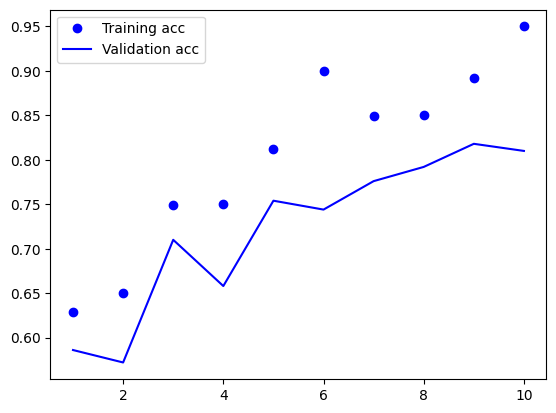

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.legend()



plt.show()

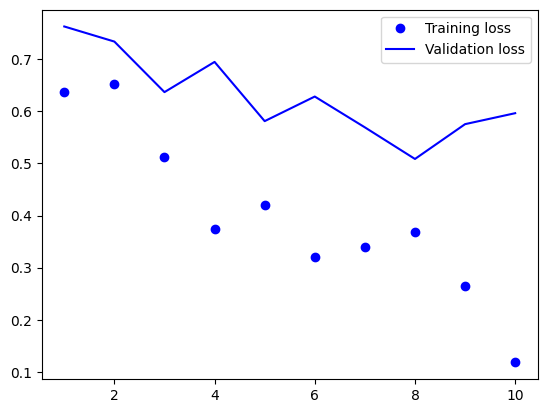

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.legend()

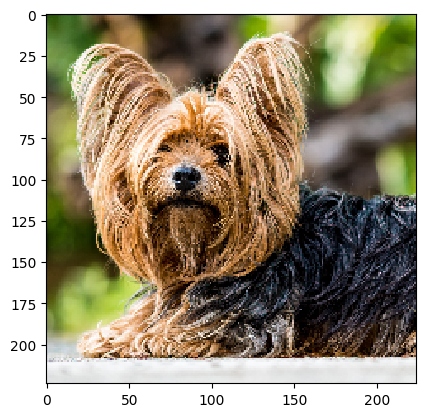

In [ ]:
from tensorflow.keras.preprocessing import image
path ='/content/drive/MyDrive/Colab Notebooks/DogCat/dogvscat/train/1/1.jpg'
img = image.load_img(path,target_size=(224,224))
plt.imshow(img,interpolation='nearest')
plt.show()

In [ ]:
img_array = np.array(img)
img_array.shape

(224, 224, 3)

In [ ]:
img_array=img_array.reshape(1,224,224,3)

In [ ]:
a = model.predict(img_array)
if a==[[0]]:
    print('cat')
else:
    print('dog')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
dog


In [ ]:
model.save("dog_cat_test2.h5")